<a href="https://colab.research.google.com/github/simonebugo/Big_Data/blob/main/26_07_24.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [42]:
import numpy as np
import pandas as pd

In [43]:
df = pd.read_csv("dataset.csv")
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


Quante sono le istanze contenute nel dataset? _____ Il dataset è completo (cioè per ogni istanza tutti i valori di ogni attributo sono sempre correttamente specificati – non esistono “missing values”)? _____ (punti 1).

In [44]:
df.shape

(545, 13)

In [45]:
df.isnull().values.any()

np.False_

Verificare se è vero che le case situate su una strada principale sono quelle più costose (punti 1). Considerando soltanto le case su strada principale, realizzare una pivot table attraverso la quale mostrare il prezzo medio delle case con / senza guestroom (sulle righe) con / senza seminterrato (colonne). Quale caratteristica tra guestroom e seminterrato comporta un aumento maggiore del prezzo della casa? Motivare la scelta (punti 2).

In [46]:
#posso raggruppare per tipo di locazione e vedere le medie delle feature
df.groupby('mainroad')['price'].mean()

,price
mainroad,
no,3.398905e+06
yes,4.991777e+06


In [47]:
df[df['mainroad'] == 'yes'].pivot_table(index='guestroom', columns='basement', values='price', aggfunc='mean')

basement,no,yes
guestroom,,
no,4.625947e+06,5.151417e+06
yes,6.277104e+06,5.807508e+06


Rappresentare in un istogramma la distribuzione dei valori della feature area. Poi, raggruppare i valori secondo questa suddivisione: gruppo1 (1649-3660]; gruppo2 (3660-6150]; gruppo3 (6150-9150]; gruppo4 (9150-13150]; gruppo5 (13150-16200], e visualizzare in un nuovo istogramma la distribuzione nei gruppi. Infine, indicare per ogni gruppo il numero di istanze per ogni valore di bedrooms. Si può dire che le case più grandi hanno più camere da letto? (punti 3)

In [48]:
import matplotlib.pyplot as plt

<Axes: ylabel='Frequency'>

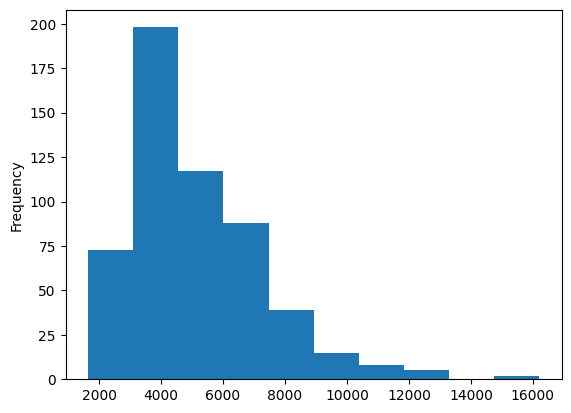

In [49]:
plt.figure()
df['area'].plot.hist()

In [50]:
g1 = df[(df['area'] >= 1649) & (df['area'] < 3660)]['area']
g2 = df[(df['area'] >= 3660) & (df['area'] < 6150)]['area']
g3 = df[(df['area'] >= 6150) & (df['area'] < 9150)]['area']
g4 = df[(df['area'] >= 9150) & (df['area'] < 13150)]['area']
g5 = df[(df['area'] >= 13150) & (df['area'] < 16200)]['area']

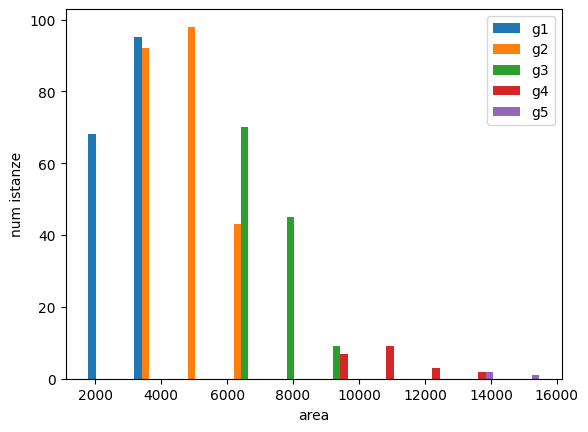

In [51]:
plt.figure()
plt.hist([g1, g2, g3, g4, g5],
         label=['g1', 'g2', 'g3', 'g4', 'g5'])

plt.xlabel('area')
plt.ylabel('num istanze')
plt.legend()
plt.show()

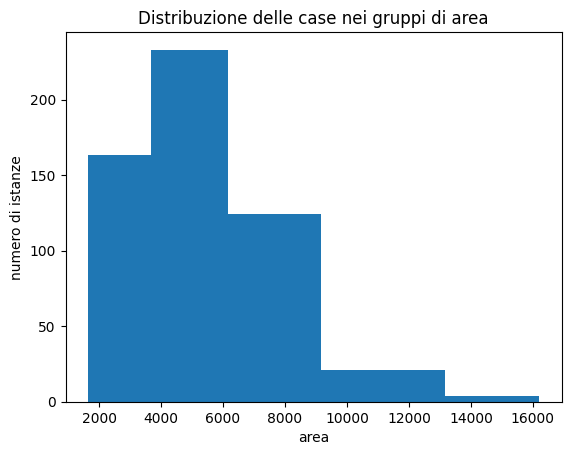

In [52]:
#altra soluzione

bins = [1649, 3660, 6150, 9150, 13150, 16200]
plt.figure()
plt.hist(df['area'], bins=bins)
plt.xlabel('area')
plt.ylabel('numero di istanze')
plt.title('Distribuzione delle case nei gruppi di area')
plt.show()


In [53]:
#indicare per ogni gruppo il numero di istanze per ogni valore di bedrooms. Si può dire che le case più grandi hanno più camere da letto?
labels = ['gruppo1', 'gruppo2', 'gruppo3', 'gruppo4', 'gruppo5']
#creo nuova colonna che in base al valore di area controlla a che gruppo appartiene
df['area_group'] = pd.cut(df['area'], bins=bins, labels=labels)
df


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,area_group
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished,gruppo3
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished,gruppo3
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished,gruppo4
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished,gruppo3
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished,gruppo3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished,gruppo1
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished,gruppo1
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished,gruppo1
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished,gruppo1


In [54]:
df.pivot_table(
    values='price',
    index='area_group',
    columns='bedrooms',
    aggfunc='count'
)



/tmp/ipython-input-564786222.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  df.pivot_table(


bedrooms,1,2,3,4,5,6
area_group,,,,,,
gruppo1,1,55,84,20,3,1
gruppo2,1,59,125,43,3,1
gruppo3,0,16,78,27,3,0
gruppo4,0,5,11,5,0,0
gruppo5,0,1,2,0,1,0


Considerare solo le case con almeno 2 bagni e almeno 2 camere da letto, rappresentare in uno scatterplot i valori di price (ascisse) e area (ordinate). Colorare i punti nel grafico in base alla presenza dell’aria condizionata. Usare i nomi dei due attributi come etichette di ascisse e ordinate. (punti 3)

Text(0, 0.5, 'area')

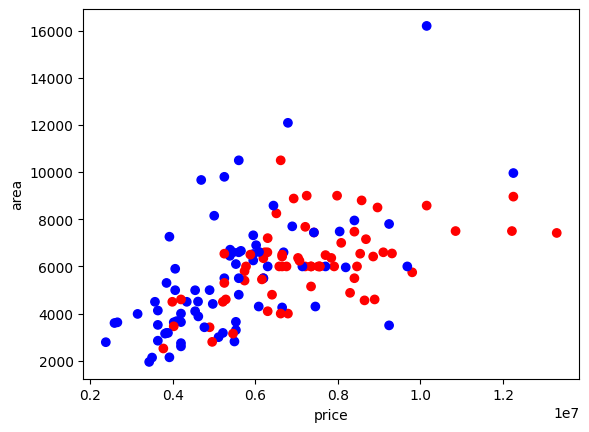

In [55]:
price = df[(df['bathrooms']>=2) & (df['bedrooms']>=2)]['price']
area = df[(df['bathrooms']>=2) & (df['bedrooms']>=2)]['area']
colors = df[(df['bathrooms']>=2) & (df['bedrooms']>=2)]['airconditioning'].map({'yes': 'red', 'no': 'blue'})
plt.scatter(price, area, c=colors)
plt.xlabel("price")
plt.ylabel("area")


--------------------------------------
PARTE 2
--------------------------------------

In [56]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression, SGDRegressor, LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.dummy import DummyRegressor
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.preprocessing import StandardScaler, KBinsDiscretizer
from sklearn.decomposition import TruncatedSVD
from sklearn.pipeline import FeatureUnion
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import FunctionTransformer
from sklearn.metrics import r2_score, mean_squared_log_error

Si vuole predire il prezzo di vendita delle case. Ricaricare il dataset originale, eliminare eventuali attributi inutili (giustificare la scelta) ed eventuali istanze con valori nulli. Convertire i valori delle colonne mainroad, guestroom, basement, hotwaterheating, airconditioning, prefarea in modo che “yes” sia sostituito con 1 e “no” con 0. Trasformare anche i valori testuali della colonna furnishingstatus in valori numerici a piacere. Dividere il dataset in modo che 3/4 degli elementi siano contenuti in un nuovo dataset “train” e 1/4 nel dataset “test”

Allenare il train con il modello LinearRegression e valutare il Mean Squared Logarithmic Error (MSLE) e R2 sia sul dataset train sia sul dataset test. Confrontare i risultati ottenuti con quelli ottenuti con una predizione basata sul modello SGDRegressor. Effettuare alcune considerazioni sui risultati ottenuti. (punti 4)

In [57]:
df = pd.read_csv("dataset.csv")
df.dtypes #vedo che non ho solo features numeriche

,0
price,int64
area,int64
bedrooms,int64
bathrooms,int64
stories,int64
mainroad,object
guestroom,object
basement,object
hotwaterheating,object
airconditioning,object


In [58]:
df.isnull().sum()

,0
price,0
area,0
bedrooms,0
bathrooms,0
stories,0
mainroad,0
guestroom,0
basement,0
hotwaterheating,0
airconditioning,0


In [59]:
le = LabelEncoder()
for column in df.columns:
  if df[column].dtype == object:
    df[column] = le.fit_transform(df[column])
#trasformo così le colonne che sono obj in numeri. il fit trasform va in ordine
#alfabetico quindi il no con lo 0 e il yes con l'1
#per furnishingstatus invece avremo 'full' → 0 'semi' → 2 'unfurnished' → 1


In [60]:
df['furnishingstatus']

,furnishingstatus
0,0
1,0
2,1
3,0
4,0
...,...
540,2
541,1
542,2
543,0


In [61]:
X = df.drop('price', axis = 1) #elimino da ogni riga 'price' (il mio target,y), in x ho solo le features
y = df['price'] #y è il target, test set
X_train, X_test, Y_train, Y_test = train_test_split(X,y, test_size=0.25, random_state=42)

In [62]:
#def di un dizionario con i modelli da testare è una convenzione che si fa, in quest caso il modello è uno solo
models = {'Linear Regressor': LinearRegression(),
          'SGDRegressor': SGDRegressor(random_state = 42)}
def test_model(name, model, traindata, testdata, trainlabels, testlabels):
  model.fit(traindata, trainlabels)
  trainpred = model.predict(traindata)
  testpred = model.predict(testdata)
  print(f" ===== {name} =====")
  print(f"MSLE on train {mean_squared_log_error(trainlabels,trainpred)}")
  print(f"MSLE on test {mean_squared_log_error(testlabels,testpred)}")
  print(f"R2 on train {r2_score(trainlabels,trainpred)}")
  print(f"R2 on test {r2_score(testlabels,testpred)}")

for name, model in models.items():
  test_model(name, model, X_train, X_test, Y_train, Y_test)

 ===== Linear Regressor =====
MSLE on train 0.03910341909061545
MSLE on test 0.06291295661857287
R2 on train 0.6839176617755487
R2 on test 0.6614628548582817
 ===== SGDRegressor =====
MSLE on train 454.3794295481512
MSLE on test 455.3330853471843
R2 on train -2.8959602532575896e+19
R2 on test -1.922854334700333e+19


Confrontare i valori di R2 ottenuti nel punto precedente con il valore di R2 che si ottiene con una 5 Fold cross validation. (punti 1)

In [63]:
# cross_val_score ritorna array di score su ciascun fold
r2_scores_lr = cross_val_score(LinearRegression(), X, y, cv=5, scoring='r2')
print("LinearRegression 5-fold R²:", r2_scores_lr)
print("LinearRegression R² medio:", np.mean(r2_scores_lr))

# SGDRegressor

r2_scores_sgd = cross_val_score(SGDRegressor(random_state = 42), X, y, cv=5, scoring='r2')
print("SGDRegressor 5-fold R²:", r2_scores_sgd)
print("SGDRegressor R² medio:", np.mean(r2_scores_sgd))

LinearRegression 5-fold R²: [ -1.94277003  -5.00707214 -16.22431367 -21.10749485  -5.27173317]
LinearRegression R² medio: -9.91067677307725
SGDRegressor 5-fold R²: [-6.54332451e+19 -5.89455830e+16 -7.92122280e+20 -1.39881579e+22
 -3.23946381e+20]
SGDRegressor R² medio: -3.0339437440995395e+21


3. Trovare i parametri migliori di SGDRegressor, agendo sui parametri loss e penalty. Scegliere alcuni valori da testare e riportare i valori di MSLE e R2 ottenuti con la migliore configurazione, confrontare questi valori con quelli ottenuti al punto 1. (punti 3)

In [64]:
parameters = {
    'loss': ["squared_error", "huber", "epsilon_insensitive"],
    'penalty':["l2","l1","elasticnet"]
}
#devi specificare refit quando si calcolano due metriche insieme. per vedere che valore best param guardo tra r2 o msle devo specificarlo nel refit. se metto refit=r2 avrò il valore migliore di r2
gd_SGD = GridSearchCV(SGDRegressor(random_state=42),
                     parameters,
                     scoring=['r2','neg_mean_squared_log_error'],
                     cv=5,
                     refit='r2')


In [65]:
gd_SGD.fit(X_train,Y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_validation.py:978: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_scorer.py", line 140, in __call__
    score = scorer._score(
            ^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_scorer.py", line 388, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
                        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/sklearn/utils/_param_validation.py", line 216, in wrapper
    return func(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_regression.py", line 746, in mean_squared_log_error
    raise ValueError(
ValueError: Mean Squared Logarithmic Error cannot b

GridSearchCV(cv=5, estimator=SGDRegressor(random_state=42),
             param_grid={'loss': ['squared_error', 'huber',
                                  'epsilon_insensitive'],
                         'penalty': ['l2', 'l1', 'elasticnet']},
             refit='r2', scoring=['r2', 'neg_mean_squared_log_error'])

In [66]:
best_par = gd_SGD.best_params_
best_par

{'loss': 'huber', 'penalty': 'l1'}

In [67]:
best_score = gd_SGD.best_score_
best_score

np.float64(-0.18561003811124016)

In [68]:
best_model = gd_SGD.best_estimator_
y_test_pred_best = best_model.predict(X_test)
y_train_pred_best = best_model.predict(X_train)
print(f"MSLE on test {mean_squared_log_error(Y_test, y_test_pred_best)}")
print(f"MSLE on train {mean_squared_log_error(Y_train, y_train_pred_best)}")
print(f"R2score on train {r2_score(Y_train, y_train_pred_best)}")
print(f"R2score on test {r2_score(Y_test, y_test_pred_best)}")

MSLE on test 0.1469259402487572
MSLE on train 0.12041799004424043
R2score on train -0.05728575552360704
R2score on test 0.20354306161708569


Studiare la correlazione tra le feature del dataset, creare un dataframe che contiene, oltre alla colonna target, le 5 feature più correlate (positivamente) al target. Ripetere la predizione sul nuovo dataset e verificare se il MSLE ottenuto con LinearRegression e SGDRegressor migliora (punti 3).

In [69]:
correlation_matrix = df.corr() #Calcola la correlazione tra tutte le colonne numeriche del DataFrame df
#Seleziona le 5 feature più correlate con il target (price)
top_correlated_features = correlation_matrix['price'].sort_values(ascending=False)[1:6].index.tolist()
new_df = df[['price'] + top_correlated_features] #unisce due liste: una lista che contiene solo la colonna target (['price']) e la lista delle feature più correlate (top_correlated_features)
new_df

,price,area,bathrooms,airconditioning,stories,parking
0,13300000,7420,2,1,3,2
1,12250000,8960,4,1,4,3
2,12250000,9960,2,0,2,2
3,12215000,7500,2,1,2,3
4,11410000,7420,1,1,2,2
...,...,...,...,...,...,...
540,1820000,3000,1,0,1,2
541,1767150,2400,1,0,1,0
542,1750000,3620,1,0,1,0
543,1750000,2910,1,0,1,0


In [70]:
X_train, X_test, Y_train, Y_test = train_test_split(new_df.drop('price', axis=1), new_df['price'], test_size=0.25, random_state=42)


In [71]:

models = {'Linear Regressor': LinearRegression(),
          'SGDRegressor': SGDRegressor(random_state = 42)}
def test_model1(name, model, traindata, testdata, trainlabels, testlabels):
  model.fit(traindata, trainlabels)
  trainpred = model.predict(traindata)
  testpred = model.predict(testdata)
  print(f" ===== {name} =====")
  print(f"MSLE on train {mean_squared_log_error(trainlabels,trainpred)}")
  print(f"MSLE on test {mean_squared_log_error(testlabels,testpred)}")

for name, model in models.items():
  test_model1(name, model, X_train, X_test, Y_train, Y_test)

 ===== Linear Regressor =====
MSLE on train 0.050891749161804986
MSLE on test 0.07976666224842414
 ===== SGDRegressor =====
MSLE on train 454.3028140821123
MSLE on test 455.2565399020838


 Considerare il dataset usato al punto 1, creare una pipeline in cui al dataset normalizzato si aggiunga una colonna che contiene i valori della colonna area discretizzati in 5 intervalli. La pipeline deve applicare il modello SGDRegressor con i parametri migliori trovati al punto 3. Valutare MSLE e R2 della predizione. (punti 3)

In [72]:
df = pd.read_csv("dataset.csv")
le = LabelEncoder()
for column in df.columns:
  if df[column].dtype == object:
    df[column] = le.fit_transform(df[column])

In [73]:
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,1,0,1,0,0,2,0,2
541,1767150,2400,3,1,1,0,0,0,0,0,0,0,1
542,1750000,3620,2,1,1,1,0,0,0,0,0,0,2
543,1750000,2910,3,1,1,0,0,0,0,0,0,0,0


In [80]:
X = df.drop('price', axis = 1)
y = df['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
all_features = X.columns.to_list()
features_without_area = [c for c in all_features if c != 'area']

In [84]:
col_tran = ColumnTransformer(
    transformers=[
        ('std', StandardScaler(),features_without_area),
        ('std_area',StandardScaler(),["area"]),
        ('discr', KBinsDiscretizer(n_bins = 5), ["area"]),
        ],
    remainder='passthrough'#per lasciare invariati gli altri attributi
)
pipeline = Pipeline(steps=[
                              ('col_tran', col_tran),
                              ('estimator', SGDRegressor(loss='huber', penalty= 'l1', random_state=42)),
                             ])
#test_model("Pipeline",pipeline,X_train,X_test,Y_train,Y_test) #riutilizzo funzione vista prima
pipeline


# NOTA:
# La feature 'area' viene utilizzata due volte:
# 1) come variabile continua (normalizzata) per catturare una relazione lineare con il prezzo
# 2) come variabile discretizzata (in 5 intervalli) aggiungendo una nuova colonna
# Per questo motivo 'area' NON è inclusa nello StandardScaler generale,
# ma viene trasformata separatamente, così da mantenere entrambe le rappresentazioni. ->>> nel testo dell'esame richiede esplicitamente di aggiungere una nuova colonna per gli intervalli di area


Pipeline(steps=[('col_tran',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('std', StandardScaler(),
                                                  ['bedrooms', 'bathrooms',
                                                   'stories', 'mainroad',
                                                   'guestroom', 'basement',
                                                   'hotwaterheating',
                                                   'airconditioning', 'parking',
                                                   'prefarea',
                                                   'furnishingstatus']),
                                                 ('std_area', StandardScaler(),
                                                  ['area']),
                                                 ('discr', KBinsDiscretizer(),
                                                  ['area'])])),
                ('estimator',
                 SGDRegressor(loss='huber', penalty='l1', random_state=42))])

In [89]:
pipeline.fit(X_train,y_train)
y_pred_pl = pipeline.predict(X_test)
print(f"R2(SGD): {r2_score(y_test,y_pred_pl):.4f}")
print(f"MSLE(SGD): {mean_squared_log_error(y_test,y_pred_pl):.4f}")

R2(SGD): -5.0264
MSLE(SGD): 144.3151


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1608: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


In [91]:
pipeline.named_steps['col_tran'].get_feature_names_out()


array(['std__bedrooms', 'std__bathrooms', 'std__stories', 'std__mainroad',
       'std__guestroom', 'std__basement', 'std__hotwaterheating',
       'std__airconditioning', 'std__parking', 'std__prefarea',
       'std__furnishingstatus', 'std_area__area', 'discr__area_0.0',
       'discr__area_1.0', 'discr__area_2.0', 'discr__area_3.0',
       'discr__area_4.0'], dtype=object)

6. Aggiungere in coda alla pipeline la funzione SelectKBest. Utilizzare la funzione di gridSearchCV per selezionare il K migliore e anche gli intervalli migliori in cui discretizzare i valori di area. Ignorare eventuali warning (punti 3).

In [92]:
# Definiamo la nuova Pipeline con SelectKBest
pipeline_kbest = Pipeline(steps=[
    ('coltran', col_tran),
    ('kbest', SelectKBest()),
    ('estimator', SGDRegressor(loss='huber', penalty= 'l1', random_state=42))
])

pipeline_kbest

Pipeline(steps=[('coltran',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('std', StandardScaler(),
                                                  ['bedrooms', 'bathrooms',
                                                   'stories', 'mainroad',
                                                   'guestroom', 'basement',
                                                   'hotwaterheating',
                                                   'airconditioning', 'parking',
                                                   'prefarea',
                                                   'furnishingstatus']),
                                                 ('std_area', StandardScaler(),
                                                  ['area']),
                                                 ('discr', KBinsDiscretizer(),
                                                  ['area'])])),
                ('kbest', SelectKBest()),
                ('estimator',
                 SGDRegressor(loss='huber', penalty='l1', random_state=42))])

In [94]:
parameters = {
    'coltran__discr__n_bins' : [2,5,7,10],
    'kbest__k' : [3,5,7,"all"],
}
gd = GridSearchCV(pipeline_kbest, parameters,scoring="r2",cv=5)
gd.fit(X_train,y_train)
Y_pred = gd.predict(X_test)
print(f"bestparam {gd.best_params_}")
print(f"bestscore {gd.best_score_}")

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1608: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1608: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1608: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1608: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_stocha

bestparam {'coltran__discr__n_bins': 2, 'kbest__k': 'all'}
bestscore -8.307062678365835


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1608: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


Considerare il dataset usato al punto 1, creare una nuova pipeline in cui gli attributi bedrooms, bathrooms e stories sono discretizzati in 2 intervalli, l’attributo area è trasformato con uno StandardScaler e tutti gli altri attributi sono lasciati invariati. La pipeline deve applicare il modello SGDRegressor con i parametri migliori trovati al punto 3. Valutare i risultati ottenuti e confrontarli con quelli ottenuti al punto 5. (punti 3).

In [95]:
df = pd.read_csv('dataset.csv')
#df.isnull().sum()
df.dropna(inplace=True) #elimino valori nulli, in questo caso non ce ne sono. obbligatorio mettere inplace per modificare davvero df. oppure scrivi df = df.dropna()
df.shape
df.drop_duplicates(inplace=True) #in questo caso non ce n'è
df.shape
#df.dtypes
le = LabelEncoder() #fa una fit trasf solo per gli object. solo per colonne categoriche
for column in df.columns:
    if df[column].dtype == object:
        df[column] = le.fit_transform(df[column])
X = df.drop('price', axis = 1)
y = df['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [97]:
col_tran = ColumnTransformer(
    transformers=[
        ('discr', KBinsDiscretizer(n_bins = 2), ["bedrooms","bathrooms","stories"]),
        ('std_area',StandardScaler(),["area"]),
        ],
    remainder='passthrough'#per lasciare invariati gli altri attributi
)
pipeline = Pipeline(steps=[
                              ('col_tran', col_tran),
                              ('estimator', SGDRegressor(loss='huber', penalty= 'l1', random_state=42)),
                             ])
pipeline.fit(X_train,y_train)
y_pred_pl = pipeline.predict(X_test)
print(f"R2(SGD): {r2_score(y_test,y_pred_pl):.4f}")
print(f"MSLE(SGD): {mean_squared_log_error(y_test,y_pred_pl):.4f}")

#R2 è equivalente mentre MSLE è calato indicando che c'è stato un miglioramento

R2(SGD): -5.0262
MSLE(SGD): 109.7609


/usr/local/lib/python3.12/dist-packages/sklearn/preprocessing/_discretization.py:306: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 1 are removed. Consider decreasing the number of bins.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1608: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
